# CNN
 - Convolutional Neural Networks
 - 딥러닝에서 주로 이미지나 영상 데이터를 처리할 때 쓰인다
 - Convolution이라는 전처리 작업이 들어가는 Neural Network 모델
 - 이미지를 날것(raw input)그대로 받음으로써 공간적/지역적 정보를 유지한 채 특성(feature)들의 계층을 빌드업
 - 이미지 전체보다는 부분을 보는것
 - 이미지의 한 픽셀과 주변 픽셀들의 연관성을 살리는 것

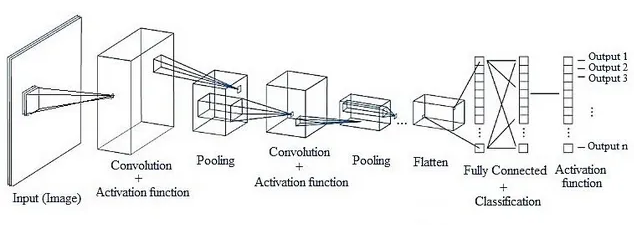

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D

In [12]:
# LeNet 5 모델의 파라미터 일부 사용 (tensorflow Keras) : Model을 쌓아 가는 구조를 통해 작성
# Sequential, add()을 사용해 Layer를 쌓아감
model = Sequential()
model.add(ZeroPadding2D(padding=2))
model.add(Conv2D(filters=6, kernel_size=5, padding="valid", strides=1, activation = "relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=16, kernel_size=5, padding="valid", strides=1, activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=84, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.build(input_shape=(None, 28, 28,1))
model.summary() # 모델의 요약을 볼 수 있음

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 32, 32, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                      

In [14]:
# Test Data set (MNIST의 손글씨 데이터를 불러옴)
import tensorflow_datasets as tfds
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (28,28)크기의 (60000,28,28) 6만장의 사진을 학습시킴
# 정확하게는 model내부에 padding이 되어(32,32,1)사진 학습을 진행)
print(x_train.shape)
# 정답은 0~9까지의 숫자 하나기 때문에, 6000,1 크기의 배열
print(y_train.shape)
# optimizer=Adam, loss function: sparse_categorical_crossentropy 레이블이 정수형태로 표현되는 경우, 주로 사용함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

(60000, 28, 28)
(60000,)
Epoch 1/5
1875/1875 [==============================] - 40s 20ms/step - loss: 0.2787 - accuracy: 0.9356
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0763 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0603 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0576 - accuracy: 0.9845
0.984499990940094


In [ ]:
# 검증
# 필자가 쓴 필체도 확인해 보기 위해 PIL을 통해 이미지 불러오기 위한 라이브러리
from PIL import Image
import numpy as np
# Colab환경에서 시행하기 때문에 Drive Mount필요
from google.colab import drive
drive.mount("/content/drive")
# 이미지를 import하고
image = Image.open('')

In [15]:
# 오픈 소스에서 가져온 Keras 모델에서 컨볼루션레이어의 출력 값을 볼 수 있는 함수
def visualize_conv_layer(model, layer_name, test_image):
  layer_output=model.get_layer(layer_name).output
  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
  intermediate_prediction=intermediate_model.predict(test_image.reshape(1,28,28,1))
  print(np.shape(intermediate_prediction))
  fig,ax=plt.subplots(1,intermediate_prediction.shape[3],figsize=(32,10))
  for i in range(intermediate_prediction.shape[3]):
      ax[i].imshow(intermediate_prediction[0, :, :, i], cmap='gray')
# 오픈소스에서 가져온 Keras 모델에서 Dense 레이어의 출력 값을 볼 수 있는 함수.
def visualize_dense_layer(model, layer_name, test_image):
  layer_output=model.get_layer(layer_name).output
  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
  intermediate_prediction=intermediate_model.predict(test_image.reshape(1,28,28,1))
  print(np.shape(intermediate_prediction))
  fig,ax=plt.subplots(figsize=(50,10))
  ax.imshow(intermediate_prediction, cmap='gray')

In [16]:
# 0는 Zeropadding만 한 상태기 때문에, (28,28,1)-> (32,32,1)
# Convolution Layer 첫번째 conv_1의 출력 이미지를 출력
model.layers[1]._name='conv_1'
print(model.layers[1].name)
visualize_conv_layer(model, 'conv_1', image)

In [ ]:
# Convolution Layer conv_2의 출력 이미지를 출력
model.layers[2]._name='conv_2'
print(model.layers[2].name)
visualize_conv_layer(model, 'conv_2', image)

In [ ]:
# Convolution Layer conv_3의 출력 이미지를 출력
model.layers[3]._name='conv_3'
print(model.layers[3].name)
visualize_conv_layer(model, 'conv_3', image)

In [ ]:
# Convolution Layer conv_4의 출력 이미지를 출력
model.layers[4]._name='conv_4'
print(model.layers[4].name)
visualize_conv_layer(model, 'conv_4', image)

In [ ]:
# Dense Layer 출력 (Flatten) 이미지를 출력
model.layers[5]._name='Flatten'
print(model.layers[5].name)
visualize_dense_layer(model, 'Flatten', image)

In [ ]:
# Dense Layer 출력 (activation=relu인 Layer 1번째) 이미지를 출력
model.layers[6]._name='Dense_1'
print(model.layers[6].name)
visualize_dense_layer(model, 'Dense_1', image)

In [ ]:
# Dense Layer 출력 (activation=relu인 Layer 2번째) 이미지를 출력
model.layers[7]._name='Dense_2'
print(model.layers[7].name)
visualize_dense_layer(model, 'Dense_2', image)

In [ ]:
# Dense Layer 출력 (activation=Softmax Layer) 값을 출력 -> 정답 출력
model.layers[8]._name='Softmax_1'
print(model.layers[8].name)
visualize_dense_layer(model, 'Softmax_1', image)

In [ ]:
#테스트 이미지를 reshape하고 모델에 넣어 예측.
x_test=image.reshape((-1,28,28,1))
predict_x=model.predict(x_test)
# 정답은 배열의 최댓값으로 출력
res=np.argmax(predict_x,axis=1)
print(res)

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 이미지를 1차원으로 펼침
    Dense(128, activation='relu'),  # fully connected layer
    Dense(10)  # 출력층 (클래스 개수에 맞게 설정)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=5)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2595 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1121 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0766 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0439 - accuracy: 0.9861
313/313 - 1s - loss: 0.0779 - accuracy: 0.9770 - 943ms/epoch - 3ms/step

Test accuracy: 0.9769999980926514


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# 데이터 불러오기 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 모델 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')

# 모델 평가
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

test_model(model, test_loader)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 45213892.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1664683.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13375077.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3426970.46it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [0/5], Batch [0/938], Loss: 2.3050
Epoch [0/5], Batch [100/938], Loss: 0.2796
Epoch [0/5], Batch [200/938], Loss: 0.3654
Epoch [0/5], Batch [300/938], Loss: 0.4841
Epoch [0/5], Batch [400/938], Loss: 0.1170
Epoch [0/5], Batch [500/938], Loss: 0.1915
Epoch [0/5], Batch [600/938], Loss: 0.0989
Epoch [0/5], Batch [700/938], Loss: 0.2621
Epoch [0/5], Batch [800/938], Loss: 0.0678
Epoch [0/5], Batch [900/938], Loss: 0.2795
Epoch [1/5], Batch [0/938], Loss: 0.1506
Epoch [1/5], Batch [100/938], Loss: 0.2310
Epoch [1/5], Batch [200/938], Loss: 0.1439
Epoch [1/5], Batch [300/938], Loss: 0.0807
Epoch [1/5], Batch [400/938], Loss: 0.2544
Epoch [1/5], Batch [500/938], Loss: 0.0386
Epoch [1/5], Batch [600/938], Loss: 0.1413
Epoch [1/5], Batch [700/938], Loss: 0.0580
Epoch [1/5], Batch [800/938], Loss: 0.0970
Epoch [1/5], Batch [900/938], Loss: 0.1531
Epoch [2/5], Batch [0/938], Loss: 0.0910
Epoch [2/5], Batch [100/938], Loss: 0.0865
Epoch [2/5], Batch [200/938], Loss: 0.0274
Epoch [2/5], Batc